In [3]:
import platform
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [4]:
# 한글 및 마이너스 표시 설정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    matplotlib.rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

Unknown System


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

# 02 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                       test_size=0.3, random_state=0)

### 기본 모델

In [7]:
# 앙상블 - 랜덤포레스트
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.959


In [8]:
# KNN

model =  KNeighborsClassifier()
model.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 0.940
테스트 세트 정확도 : 0.947


In [9]:
# GradientBoosting

model =  GradientBoostingClassifier()
model.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


- GradientBoostingClassifier 가 가장 좋은 결과를 보여주고 있다

### 하이퍼 파라미터 최적화

In [10]:
lr_rate = [0.1, 0.05, 0.01, 0.005, 0.001]
depth_num = range(1, 15, 1)

for lr in lr_rate:
    for num in depth_num:
        model = GradientBoostingClassifier(learning_rate=lr, max_depth=num, random_state=0).fit(X_train, y_train)

        print("learning rate, max_depth ", lr, num)
        print(model.score(X_train, y_train))
        print(model.score(X_test, y_test))
        print()

learning rate, max_depth  0.1 1
0.9899497487437185
0.9532163742690059

learning rate, max_depth  0.1 2
1.0
0.9649122807017544

learning rate, max_depth  0.1 3
1.0
0.9766081871345029

learning rate, max_depth  0.1 4
1.0
0.9473684210526315

learning rate, max_depth  0.1 5
1.0
0.9239766081871345

learning rate, max_depth  0.1 6
1.0
0.935672514619883

learning rate, max_depth  0.1 7
1.0
0.9239766081871345

learning rate, max_depth  0.1 8
1.0
0.9239766081871345

learning rate, max_depth  0.1 9
1.0
0.9239766081871345

learning rate, max_depth  0.1 10
1.0
0.9239766081871345

learning rate, max_depth  0.1 11
1.0
0.9298245614035088

learning rate, max_depth  0.1 12
1.0
0.9298245614035088

learning rate, max_depth  0.1 13
1.0
0.9298245614035088

learning rate, max_depth  0.1 14
1.0
0.9298245614035088

learning rate, max_depth  0.05 1
0.9798994974874372
0.9532163742690059

learning rate, max_depth  0.05 2
0.9949748743718593
0.9473684210526315

learning rate, max_depth  0.05 3
1.0
0.96491228070175

In [12]:
# 수정된 GradientBoostingClassifier 모델

model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, random_state=0)
model.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.977


In [13]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

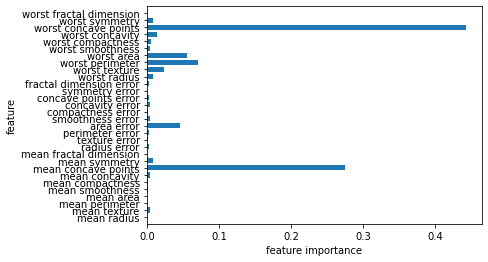

In [15]:
import numpy as np
feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(model, feature_num, feature_names)

In [16]:
import pandas as pd
data = {'eng': ['b', 'c', 'a', 'd']}
df = pd.DataFrame(data)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,eng
0,b
1,c
2,a
3,d


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [18]:
en_x = LabelEncoder()
df['eng_label'] = en_x.fit_transform(df['eng'])
df

,eng,eng_label
0,b,1
1,c,2
2,a,0
3,d,3


In [23]:
onehot = OneHotEncoder()
val = df['eng_label'].values.reshape(-1,1)
y = onehot.fit_transform(val).toarray()
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [25]:
onehot_val = pd.DataFrame(y, dtype=int)
df_new = pd.concat([df, onehot_val], axis=1)

In [26]:
df_new

,eng,eng_label,0,1,2,3
0,b,1,0,1,0,0
1,c,2,0,0,1,0
2,a,0,1,0,0,0
3,d,3,0,0,0,1


In [27]:
data = { "회사명": ["MS","Apple", "Google", "Google"]}

In [28]:
df = pd.DataFrame(data)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,회사명
0,MS
1,Apple
2,Google
3,Google


In [30]:
en_x = LabelEncoder()
df['회사명'] = en_x.fit_transform(df['회사명'])
df

,회사명
0,2
1,0
2,1
3,1


In [31]:
onehot = OneHotEncoder()
val = df['회사명'].values.reshape(-1,1)
y = onehot.fit_transform(val).toarray()
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [32]:
onehot_val = pd.DataFrame(y, dtype=int)
df_new = pd.concat([df, onehot_val], axis=1)
df_new

,회사명,0,1,2
0,2,0,0,1
1,0,1,0,0
2,1,0,1,0
3,1,0,1,0
